# Proyek Belajar Data Sains: [Academic Institution]
- **Nama:** [Salsabila Rizka Maulidina]
- **Email:** [a004xbm448@devacademy.id atau salsaajadehhh@gmail.com]
- **ID Dicoding:** [a004xbm448]

# 1. Preparation

## Perisapan Library yang Digunakan

Langkah ini digunakan untuk memanggil pustaka yang akan digunakan dalam projek ini, sperti untuk menganalisis dan memvisualisasikan data, kita mengimpor pandas, matplotlib.pyplot, dan seaborn. Pustaka seperti sklearn dan imblearn digunakan untuk persiapan data, membangun model machine learning, dan mengevaluasi performanya, sementara math dan joblib mendukung operasi numerik dan penyimpanan model.

In [44]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from collections import Counter

## Prepare Dataset yang Digunakan

TUjuannya adalah memuat data dari file "data.csv" ke dalam sebuah DataFrame bernama df. Setelah dimuat, 10 baris pertama dari dataset akan ditampilkan. Ini bertujuan untuk melihat sekilas struktur dan isi awal dari data yang diunggah.

In [2]:
# Load data
df = pd.read_csv("data.csv", sep=';')

In [3]:
# Display head of the dataset
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# 2. Data Understanding

### Missing Value
Tujuan dari pengecekan nilai yang hilang adalah untuk mengidentifikasi dan menangani titik data yang tidak lengkap untuk mencegah kesalahan selama analisis dan pemodelan, dan untuk memastikan keandalan dan keakuratan hasil.

In [4]:
pd.DataFrame({'Total Missing Value': df.isna().sum()})

,Total Missing Value
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Dapat dilihat bahwa dataset ini tidak memiliki nilai kosong, sehingga siap untuk dianalisis.

### Tipe Data
Untuk memahami dataset awal, kita dapat menggunakan fungsi info() dari pandas. Fungsi ini menunjukkan jumlah data, tipe setiap kolom, dan keberadaan nilai kosong.

In [5]:
# Check data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dari hasil di atas, dapat dilihat bahwa dataset ini berisi 4424 entri dengan 37 kolom. Terdapat 7 kolom dengan tipe data float64, 29 kolom dengan tipe data int64, dan 1 kolom dengan tipe data object. Tidak ada nilai yang hilang pada kolom-kolom tersebut, yang berarti dataset ini sudah lengkap dan siap untuk dianalisis.

### Encoding Kolom 'Status' dengan Menambah Kolom 'Status_num'
Tujuan untuk melakukan encoding pada kolom 'Status' yang bersifat kategorikal menjadi representasi numerik 'Status_num', di mana 'Graduate' menjadi 0, 'Enrolled' menjadi 1, dan 'Dropout' menjadi 2. 

In [6]:
# Encode target dengan menambah kolom baru yaitu 'Status_num' 
df['Status_num'] = df['Status'].map({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}) 

# Cek hasil 
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_num
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


### Statistik Deskriptif 
Untuk memahami distribusi dataset, kita bisa memeriksanya dengan menggunakan describe()

In [7]:
# Check statistic descriptive
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_num
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.821881
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


### Distribusi Target
Tujuannya adalah untuk menghasilkan sebuah bar chart yang menampilkan distribusi jumlah siswa berdasarkan status mereka.

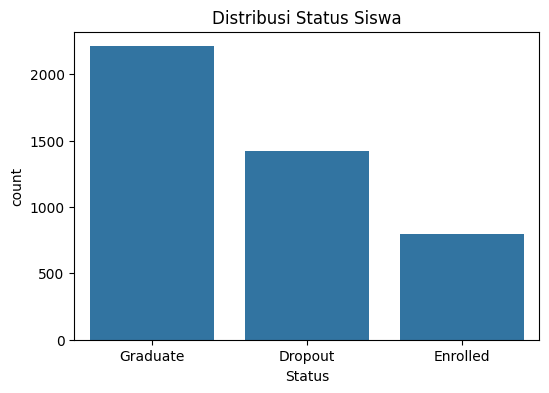

In [8]:
# Visualisasi variabel target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title("Distribusi Status Siswa")

# Save gambar
plt.savefig("distribusi_status_siswa.png", dpi=300, bbox_inches='tight')

plt.show()

Berdasarkan grafik, terlihat bahwa status "Graduate" memiliki jumlah siswa terbanyak, yaitu di atas 2000. Status "Dropout" menempati posisi kedua dengan jumlah siswa sekitar 1400. Sementara itu, status "Enrolled" memiliki jumlah siswa paling sedikit, yaitu di bawah 1000.

### Korelasi  Fitur Numerik dengan Target
Langkah ini untuk menganalisis hubungan antara fitur-fitur numerik dengan status kelulusan (Status_num) dan memvisualisasikan 10 fitur teratas yang memiliki korelasi positif dan negatif terkuat dengan status kelulusan tersebut.

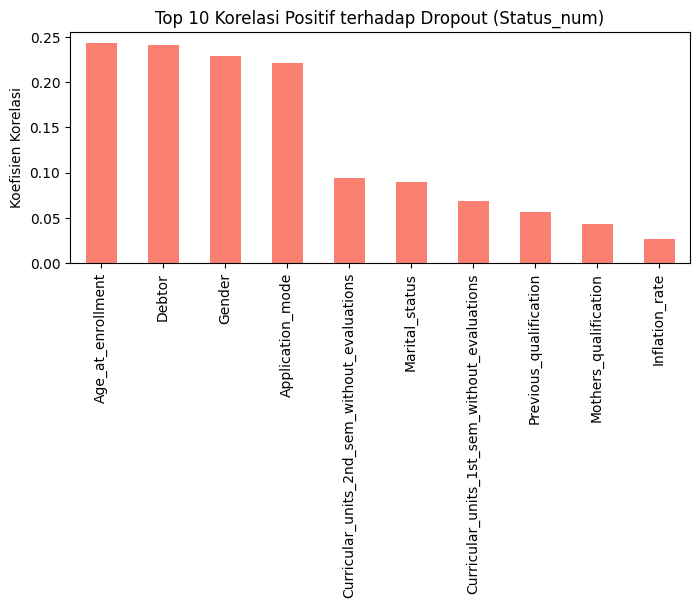

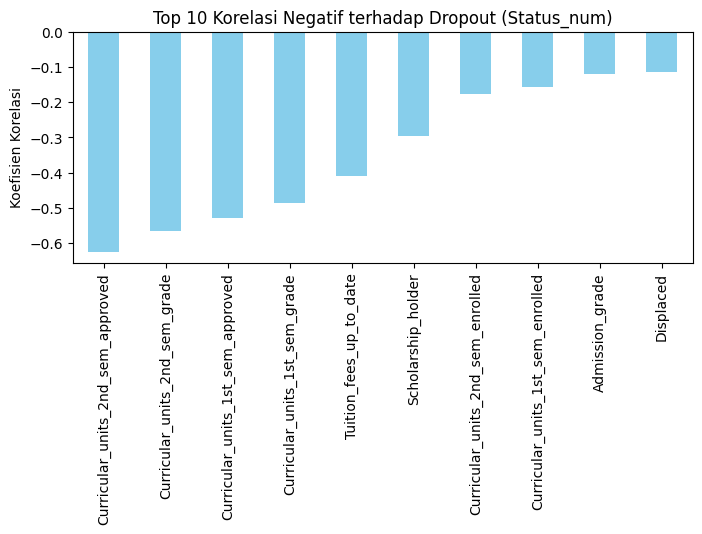

In [9]:
# Korelasi fitur numerik dengan Status_num
correlation = df.corr(numeric_only=True)
cor_target = correlation["Status_num"].sort_values(ascending=False)

# Visualisasi top 10 korelasi positif dan negatif
plt.figure(figsize=(8,3))
cor_target.drop("Status_num").sort_values(ascending=False).head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Korelasi Positif terhadap Dropout (Status_num)")
plt.ylabel("Koefisien Korelasi")

# Save gambar
plt.savefig("10_korelasi_positif.png", dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,3))
cor_target.drop("Status_num").sort_values(ascending=True).head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Korelasi Negatif terhadap Dropout (Status_num)")
plt.ylabel("Koefisien Korelasi")

# Save gambar
plt.savefig("10_korelasi_negatif.png", dpi=300, bbox_inches='tight')

plt.show()

Analisis korelasi menunjukkan bahwa usia pendaftaran dan status debitur berkorelasi positif kuat dengan dropout. Sebaliknya, kinerja akademik yang baik (nilai dan unit mata kuliah yang disetujui) memiliki korelasi negatif yang sangat kuat, menunjukkan pentingnya nilai dalam mencegah dropout. Faktor lain seperti pembayaran biaya kuliah tepat waktu dan menjadi penerima beasiswa juga berkorelasi negatif, sehingga dapat mengurangi kemungkinan dropout. Secara keseluruhan, faktor finansial, demografi, dan terutama kinerja akademik adalah pendorong utama status dropout.

### Distribusi Fitur Akademik Berdasarkan Status
Langkah ini untuk membuat dua box plot untuk memvisualisasikan distribusi nilai mahasiswa pada semester 1 dan semester 2. Setiap plot menunjukkan bagaimana nilai-nilai tersebut bervariasi berdasarkan status mahasiswa (misalnya, lulus atau tidak). Tujuannya adalah untuk memahami perbandingan dan sebaran nilai di kedua semester tersebut.

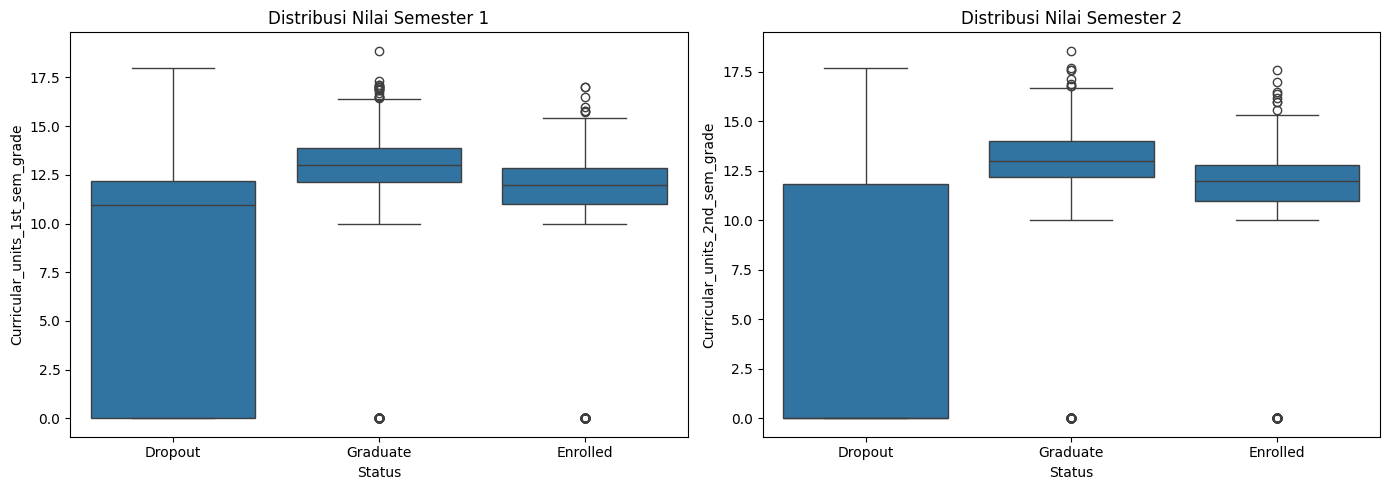

In [10]:
# Plot distribusi nilai semester 1 dan 2
fig, axs = plt.subplots(1, 2, figsize=(14,5))
sns.boxplot(data=df, x="Status", y="Curricular_units_1st_sem_grade", ax=axs[0])
axs[0].set_title("Distribusi Nilai Semester 1")

sns.boxplot(data=df, x="Status", y="Curricular_units_2nd_sem_grade", ax=axs[1])
axs[1].set_title("Distribusi Nilai Semester 2")

plt.tight_layout()

# Save gambar
plt.savefig("distribusi_nilai.png", dpi=300, bbox_inches='tight')

plt.show()

Berdasarkan box plot distribusi nilai, mahasiswa yang mengalami dropout menunjukkan nilai rata-rata yang jauh lebih rendah di semester 1 dan 2 dibandingkan dengan mahasiswa graduate dan enrolled. Mahasiswa graduate memiliki nilai rata-rata tertinggi di kedua semester, diikuti oleh mahasiswa enrolled. Hal ini secara jelas menunjukkan bahwa kinerja akademik yang buruk, terutama nilai yang rendah, adalah indikator kuat risiko dropout.

### Perbandingan Fitur Kategori terhadap Status
Langkah ini untuk membuat dua box plot untuk memvisualisasikan distribusi nilai mahasiswa pada semester 1 dan semester 2. Setiap plot menunjukkan bagaimana nilai-nilai tersebut bervariasi berdasarkan status mahasiswa (misalnya, lulus atau tidak). Tujuannya adalah untuk memahami perbandingan dan sebaran nilai di kedua semester tersebut.

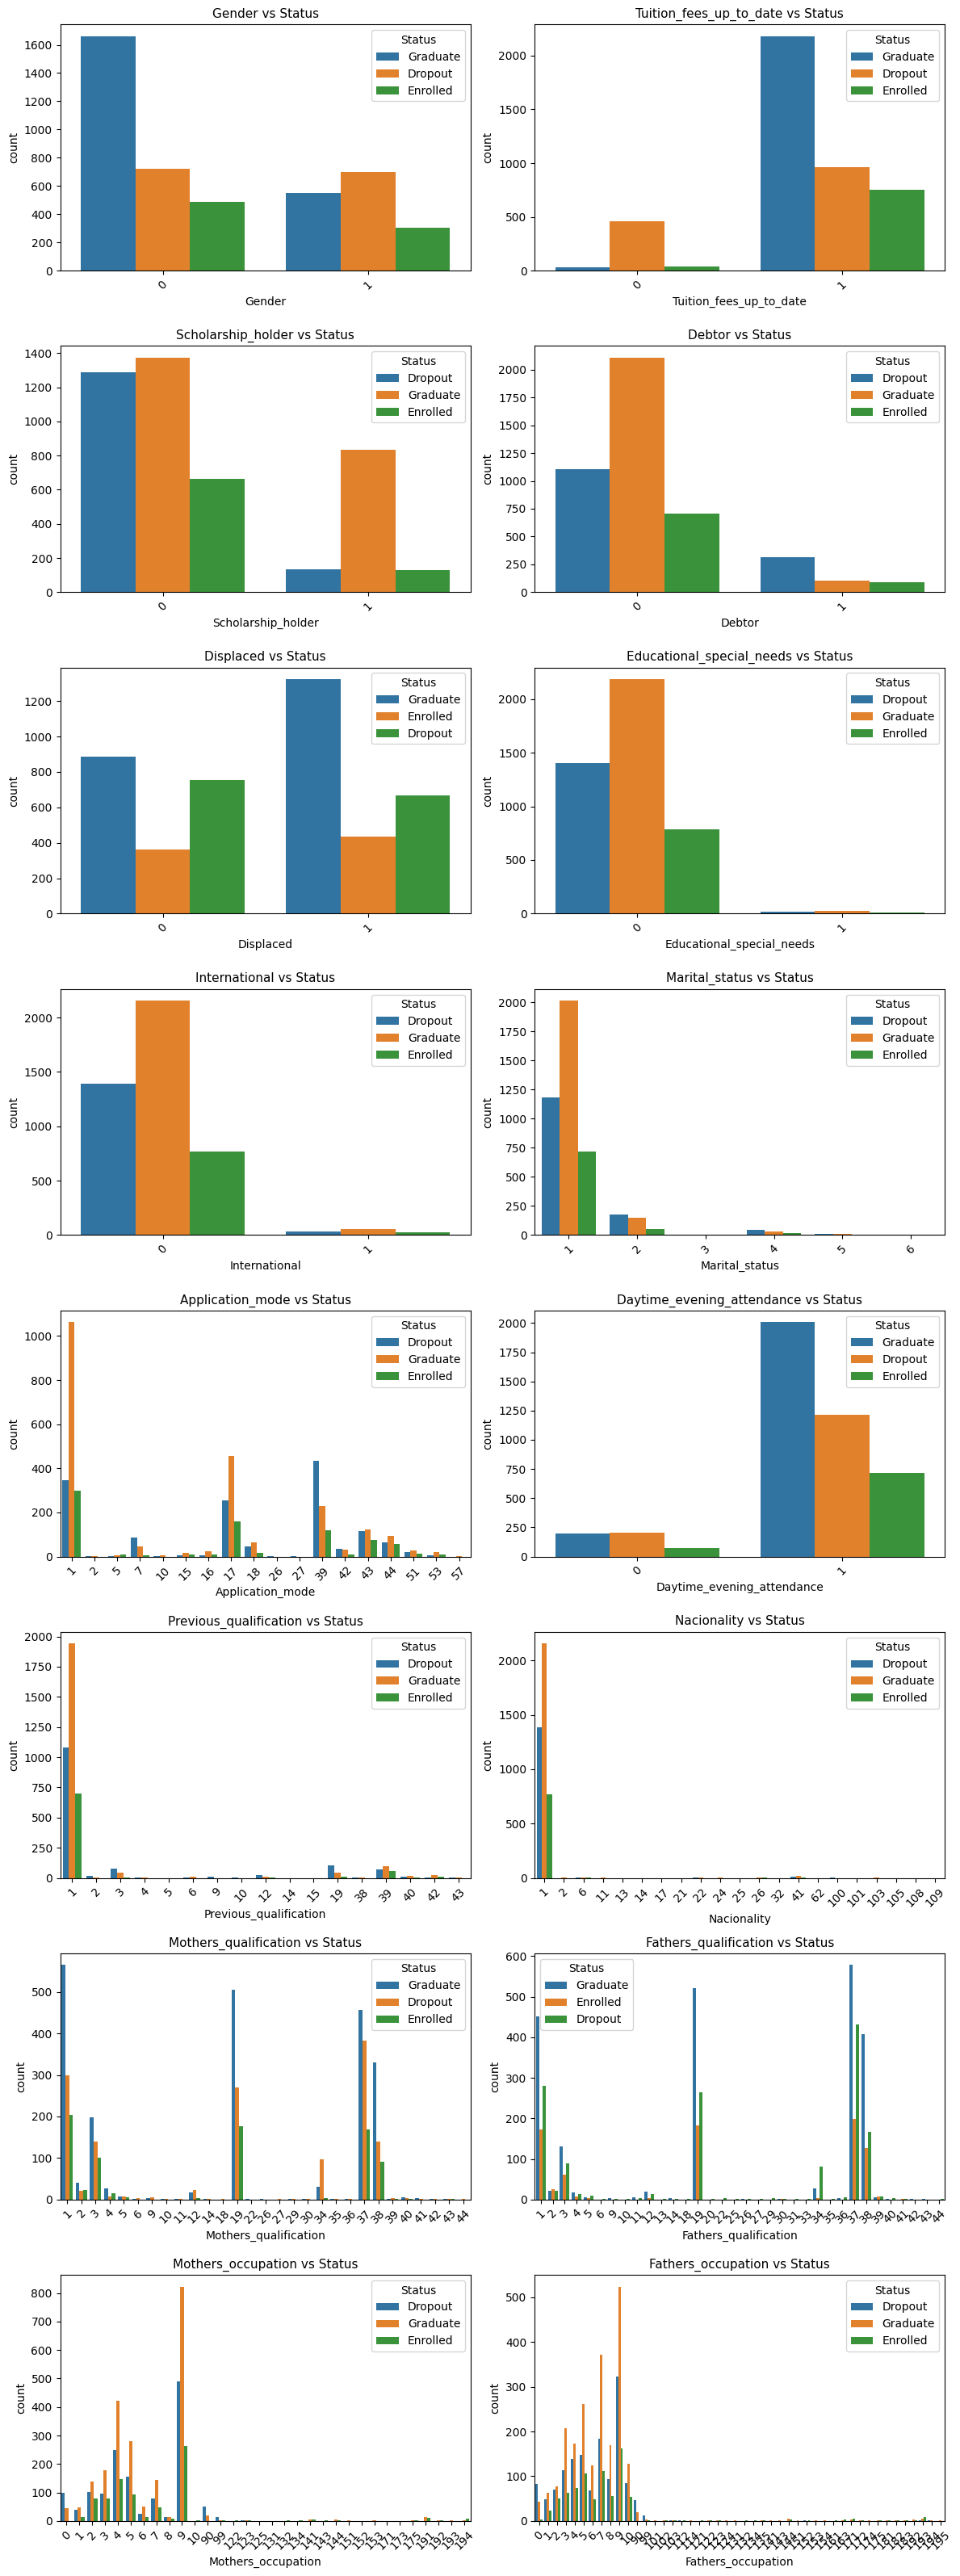

In [12]:
# Fungsi bantu untuk plot kategori
def plot_categoricals_grid(df, cols, n_cols=2):
    n_rows = int(np.ceil(len(cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()  # supaya bisa diakses dengan 1D loop

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, hue="Status", ax=axes[i],
                      order=sorted(df[col].unique()))
        axes[i].set_title(f"{col} vs Status", fontsize=11)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title="Status", loc="best")

    # Hapus plot kosong jika jumlah fitur ganjil
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # Save gambar
    plt.savefig("kategori_vs_status.png", dpi=300, bbox_inches='tight')

# Daftar kolom kategorikal
cat_cols = [
    "Gender", 
    "Tuition_fees_up_to_date", 
    "Scholarship_holder",
    "Debtor",
    "Displaced",
    "Educational_special_needs",
    "International",
    "Marital_status",
    "Application_mode",
    "Daytime_evening_attendance",
    "Previous_qualification",
    "Nacionality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation"
]

# Panggil fungsi
plot_categoricals_grid(df, cat_cols, n_cols=2)

Visualisasi ini menunjukkan distribusi status mahasiswa (Dropout, Enrolled, Graduate) berdasarkan berbagai fitur kategorikal. Beberapa kategori fitur lain cenderung memiliki proporsi mahasiswa graduate atau enrolled yang lebih tinggi, mengindikasikan hubungan penting antara fitur kategorikal ini dengan keberhasilan atau kegagalan akademik. Analisis ini membantu mengidentifikasi karakteristik demografi atau latar belakang yang mungkin menjadi faktor risiko atau pelindung terhadap dropout.

# 3. Data Preparation/Preprocessing

### Hapus Kolom 'Status'
Setelah melakukan encoding pada kolom 'Status' yang bersifat kategorikal menjadi representasi numerik 'Status_num', di mana 'Graduate' menjadi 0, 'Enrolled' menjadi 1, dan 'Dropout' menjadi 2. Maka, kolom 'Status' yang asli dihapus karena sudah tidak diperlukan. Terakhir, menampilkan lima baris pertama untuk memverifikasi hasilnya. 

In [13]:
# Drop Status asli
df = df.drop(columns=['Status'])

# Cek hasil 
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_num
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,2
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


Terlihat bahwa kolom 'Status' telah hilang dan digantikan menjadi koom 'Status_num'

### Cek dan Tangani Outlier
Langkah ini untuk membuat visualisasi box plot dari semua kolom numerik dalam dataset. Tujuannya adalah untuk mengidentifikasi keberadaan outlier pada setiap fitur numerik. Dengan melihat titik-titik di luar "kumis" box plot, kita dapat mengetahui apakah ada nilai-nilai ekstrem yang perlu ditangani dalam proses pra-pemrosesan data.

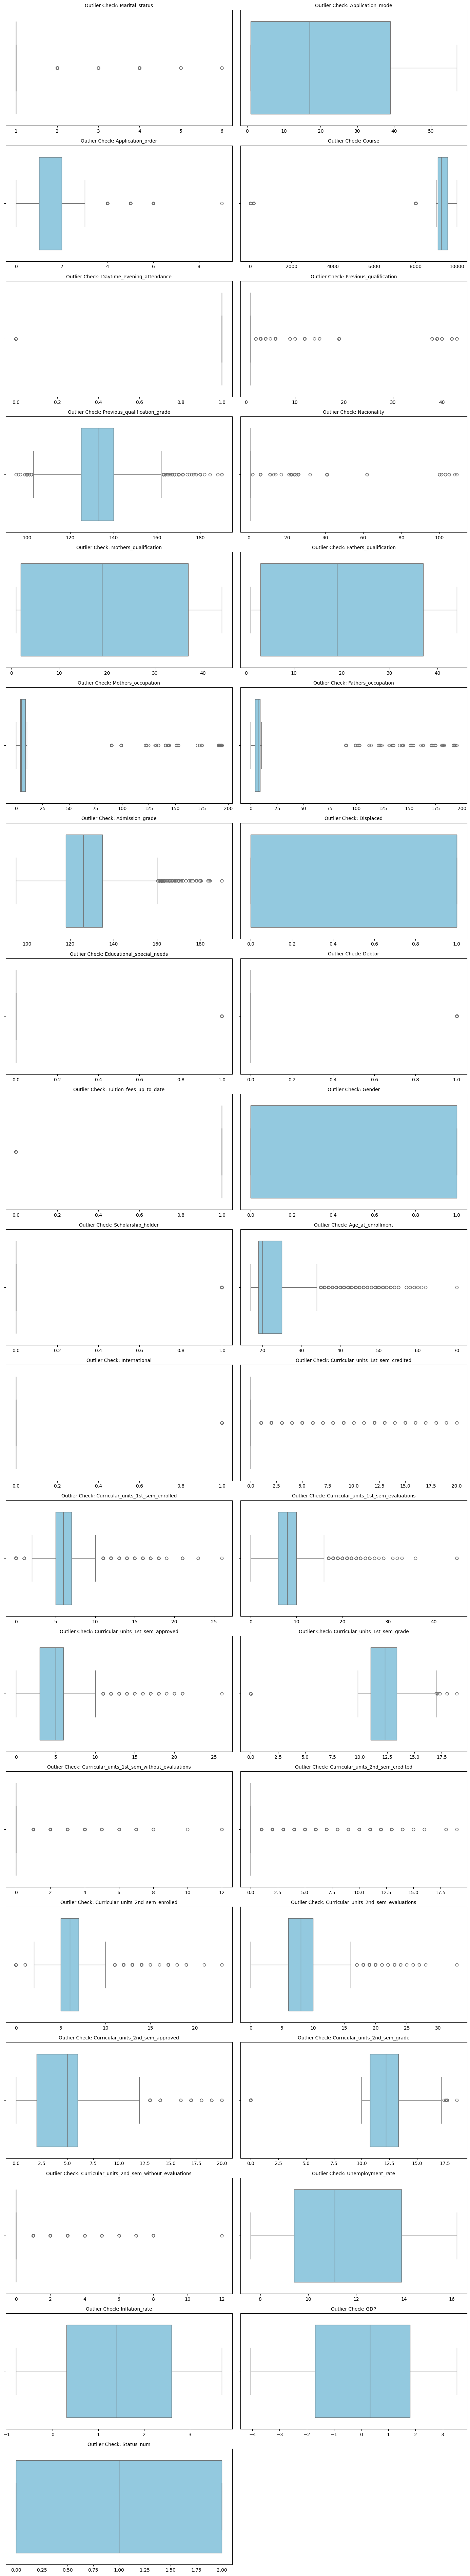

In [14]:
# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Atur jumlah kolom per baris
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Loop setiap kolom dan plot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Outlier Check: {col}", fontsize=10)
    axes[i].set_xlabel("")
    
# Hapus axis kosong jika kolomnya ganjil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save gambar
plt.savefig("boxplot_outliers.png", dpi=300, bbox_inches='tight')

plt.show()

Banyak fitur menunjukkan adanya outlier yang signifikan, sehingga perlunya pra-pemrosesan data untuk memastikan kualitas model. Secara keseluruhan, faktor akademik dan finansial adalah prediktor utama dropout yang perlu ditangani dengan penanganan outlier yang tepat.

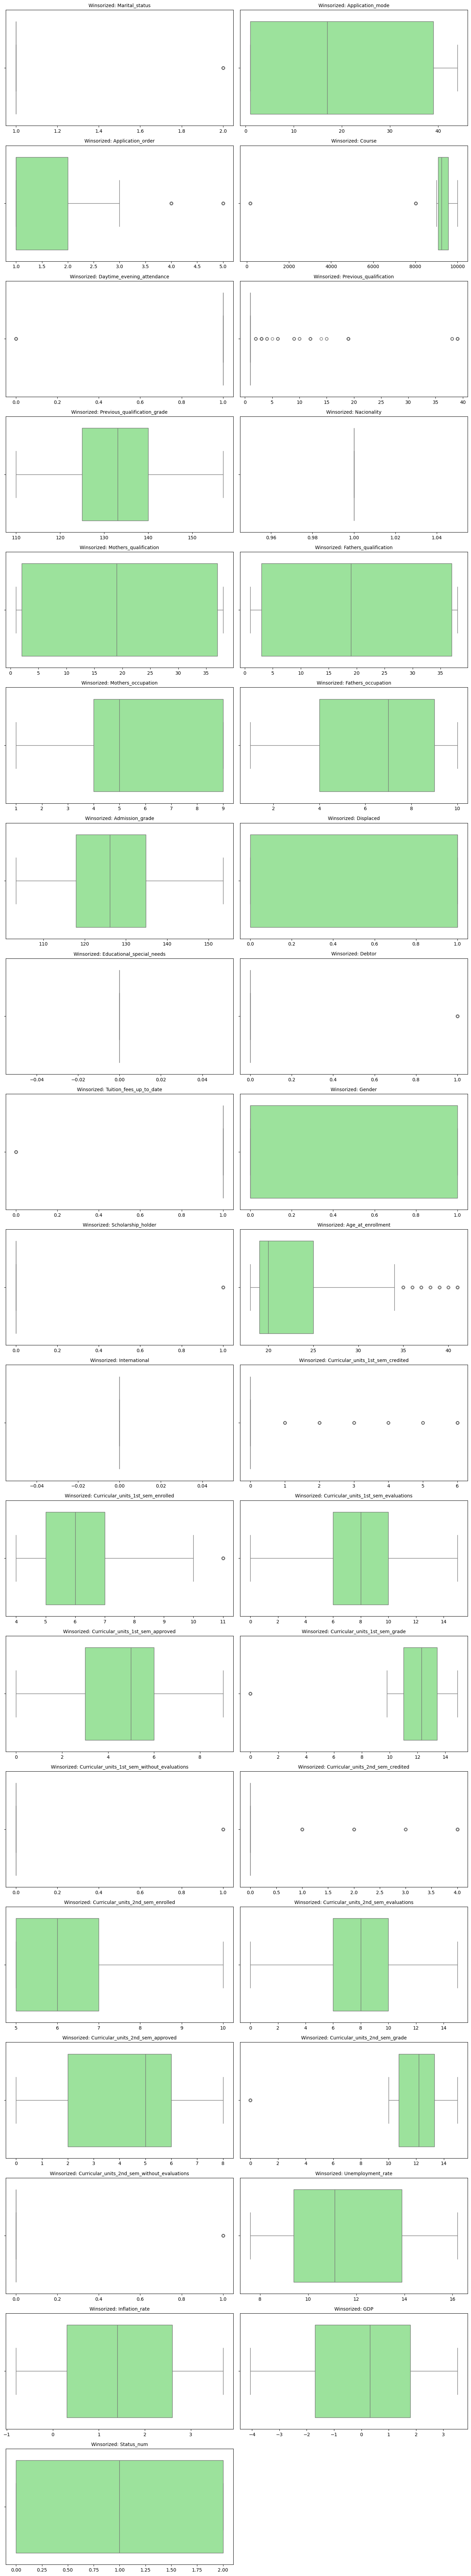

In [15]:
# Winsorization (Pennganan Outlier)
for col in numeric_cols:
    # winsorize returns a masked array, so convert to list then to Series
    winsorized_col = winsorize(df[col], limits=[0.05, 0.05])
    df[col] = pd.Series(winsorized_col)

# Visualisasi setelah Winsorization
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color="lightgreen")
    axes[i].set_title(f"Winsorized: {col}", fontsize=10)
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save gambar
plt.savefig("boxplot_after_winsore.png", dpi=300, bbox_inches='tight')

plt.show()

Setelah penerapan Winsorization, sebagian besar outlier pada fitur-fitur numerik telah berhasil diminimalisir atau dihilangkan. Box plot yang awalnya menunjukkan banyak titik ekstrem kini tampak lebih ringkas, dengan whiskers yang lebih pendek dan rentang data yang lebih terkonsentrasi. Hal ini mengindikasikan bahwa data kini lebih "bersih" dari nilai-nilai ekstrem, yang penting untuk meningkatkan stabilitas dan performa model machine learning.

### Scaling Data
StandardScaler diinisialisasi dan digunakan untuk menskalakan fitur-fitur dalam X. Proses penskalaan ini mengubah nilai-nilai fitur agar memiliki rata-rata nol dan standar deviasi satu

In [20]:
# Pisahkan fitur dan target
X = df.drop(columns=['Status_num'])
y = df['Status_num']

# Inisialisasi scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Cek hasil dengan Statistik deskriptif hasil scaling
X_scaled.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4424.0,4.424000e+03,4.424000e+03,...,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,9.636656e-17,-4.497106e-17,-1.124276e-17,-3.196157e-16,7.066881e-17,-2.409164e-18,-2.939180e-16,0.0,-5.781993e-17,1.220643e-16,...,2.248553e-17,2.569775e-17,1.369208e-16,-9.797266e-17,1.284887e-16,1.750659e-16,-3.533440e-17,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,0.0,1.000113e+00,1.000113e+00,...,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-3.589699e-01,-1.017605e+00,-5.720925e-01,-4.212946e+00,-2.856470e+00,-3.511368e-01,-1.912051e+00,0.0,-1.190433e+00,-1.387249e+00,...,-2.668079e-01,-3.372532e-01,-9.917997e-01,-2.200186e+00,-1.601147e+00,-1.970069e+00,-2.609273e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-3.589699e-01,-1.017605e+00,-5.720925e-01,1.105778e-01,3.500825e-01,-3.511368e-01,-6.370762e-01,0.0,-1.126233e+00,-1.256762e+00,...,-2.668079e-01,-3.372532e-01,-9.917997e-01,-5.365084e-01,-8.526029e-01,1.067439e-01,-2.609273e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-3.589699e-01,-8.730737e-02,-5.720925e-01,1.847868e-01,3.500825e-01,-3.511368e-01,5.141015e-02,0.0,-3.482836e-02,-2.128671e-01,...,-2.668079e-01,-3.372532e-01,-2.448263e-01,1.805075e-02,2.702137e-01,3.868721e-01,-2.609273e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,-3.589699e-01,1.191851e+00,2.496404e-01,3.390251e-01,3.500825e-01,-3.511368e-01,6.378985e-01,0.0,1.120777e+00,9.615150e-01,...,-2.668079e-01,-3.372532e-01,5.021472e-01,5.726099e-01,6.444859e-01,6.058229e-01,-2.609273e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,2.785749e+00,1.482569e+00,2.714839e+00,5.500115e-01,3.500825e-01,3.419323e+00,2.082870e+00,0.0,1.184977e+00,1.026758e+00,...,3.748015e+00,3.473752e+00,2.743067e+00,1.959008e+00,1.393030e+00,9.245895e-01,3.832485e+00,1.739731e+00,1.787974e+00,1.545607e+00


Hasil dari proses scaling ini ditunjukkan oleh statistik deskriptif diatas. Terlihat bahwa setiap fitur kini memiliki mean yang mendekati nol dan standard deviation yang mendekati satu. Nilai min dan max yang terdistribusi dalam rentang tertentu

###  Train-Test Split
Langkah ini berfungsi untuk membagi dataset menjadi subset pelatihan (training set) dan pengujian (testing set). Kemudian,  jumlah baris (sampel) dan kolom (fitur) di masing-masing subset untuk  mengkonfirmasi ukuran pembagian data.

In [39]:
# Split testing and training set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3096, 36)
Test size: (1328, 36)


Output tersebut menunjukkan bahwa dataset telah berhasil dibagi menjadi 3096 sampel untuk pelatihan dan 1328 sampel untuk pengujian, masing-masing dengan 36 fitur.

# 4. Modeling

Pertama-tama, kita menyeimbangkan distribusi kelas pada data training menggunakan SMOTE untuk mengatasi masalah ketidakseimbangan data. Setelah itu, model klasifikasi XGBoost dilatih menggunakan data training yang sudah seimbang tersebut.

In [40]:
# Sebelum SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))

# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({0: 1546, 2: 994, 1: 556})
After SMOTE: Counter({1: 1546, 2: 1546, 0: 1546})


Terlihat bahwa sebelum penerapan SMOTE, kelas-kelas dalam data training tidak seimbang, dengan jumlah sampel yang bervariasi (misalnya, kelas 0 sebanyak 1767, kelas 2 sebanyak 1137, dan kelas 1 sebanyak 635). Setelah SMOTE, distribusi kelas menjadi seimbang sempurna, dengan masing-masing kelas memiliki 1767 sampel.

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Train XGBoost
xgb_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_sm, y_train_sm)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# 5. Evaluation

Bertujuan untuk mengevaluasi kinerja model klasifikasi (XGBoost) yang telah dilatih menggunakan data pengujian. Confusion Matrix memberikan rincian prediksi benar dan salah untuk setiap kelas, menunjukkan seberapa baik model membedakan antara dropout, enrolled, dan graduate. Classification Report melengkapi dengan metrik seperti precision, recall, dan f1-score untuk setiap kelas, serta Accuracy Score memberikan gambaran umum persentase prediksi yang benar dari seluruh data pengujian.

In [42]:
# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

Confusion Matrix:
[[595  50  18]
 [ 82 105  51]
 [ 46  40 341]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       663
           1       0.54      0.44      0.48       238
           2       0.83      0.80      0.81       427

    accuracy                           0.78      1328
   macro avg       0.73      0.71      0.72      1328
weighted avg       0.77      0.78      0.78      1328

Accuracy Score: 0.7838855421686747


Hasil evaluasi model menunjukkan akurasi keseluruhan sebesar 78.39%, yang berarti model mampu memprediksi status mahasiswa dengan benar dalam hampir 4 dari 5 kasus. Confusion matrix mengindikasikan bahwa model sangat baik dalam mengidentifikasi mahasiswa yang tidak dropout (kelas 0), dengan precision 82% dan recall 90%. Namun, performa model terhadap kelas 1 (mahasiswa yang masih terdaftar/enrolled) masih kurang optimal, ditunjukkan oleh precision hanya 54% dan recall 44%. Di sisi lain, model mampu memprediksi mahasiswa lulusan (kelas 2) dengan cukup baik, dengan precision 83% dan recall 80%, menunjukkan kemampuan yang solid dalam mengenali lulusan.

# 6. Save the Model

Tujuannya adalah untuk menyimpan model XGBoost yang telah dilatih (xgb_model) ke dalam sebuah file .pkl agar dapat digunakan kembali di kemudian hari tanpa perlu melatih ulang

In [47]:
# Simpan model ke folder 'model'
os.makedirs("xgb_model", exist_ok=True) 
joblib.dump(xgb_model, "model/xgb_model.pkl")

['model/xgb_model.pkl']

Telrihat bahwa file bernama xgb_model.pkl tersimpan dalam folder xgb_model